In [1]:
#notebook to compare our autoencoder clustering to our kmeans clustering

#there is nothing here that requires a gpu, let's run on a cpu

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np

import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import matplotlib.patches as patches

plt.style.use('demo_style.mplstyle')

#colormap for spectrograms
colormap='hot'

In [2]:
#get job info


#import os

#os.environ["SLURM_JOB_ID"]


In [3]:
#load our data

q003_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_data.npy')
#q003_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_max.npy')
#q003_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output/q003_norm.npy')

q103_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_data.npy') 
#q103_max = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_max.npy')
#q103_norm = np.load('/global/cscratch1/sd/stephey/march2020_data/Output2/q103_norm.npy')

#add in our post-quench data
#need to cut that down to size, too

pq_data = np.load('/global/cscratch1/sd/stephey/march2020_data/Q3_Q103_postquench/pq_data.npy')


#we shuffle in the training so it's ok
qall_data = np.concatenate((q003_data, q103_data, pq_data), axis=0)

print(qall_data.shape)


(9807, 625, 512)


In [4]:
#load our encoded and pca data

encoded_all = np.load('encoded_all.npy')


In [5]:

#Try pca on encoded images
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
#need to flatten i guess?
img_pca = pca.fit_transform(encoded_all)

In [6]:
#boundary 1
boundary1 = q003_data.shape[0]

#boundary2
boundary2 = q003_data.shape[0] + q103_data.shape[0]

color_key=['red','blue','green']
color_label=[]
for i in range(qall_data.shape[0]):
    if i <= boundary1:
        color_label.append(color_key[0])
    elif boundary1 < i <= boundary2:
        color_label.append(color_key[1])
    else:
        color_label.append(color_key[2])

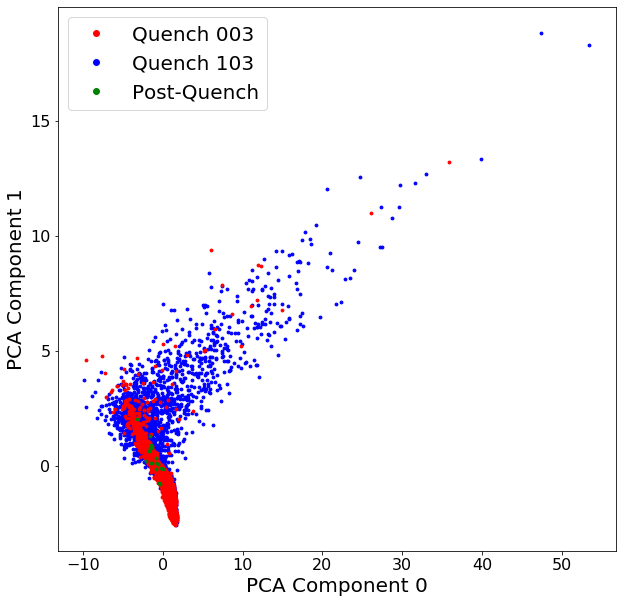

In [7]:
#plot together

msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

#hack the legend together
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


legend_elements = [Line2D([0], [0], marker='o', color='w', label='Quench 003',
                          markerfacecolor='red', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Quench 103',
                          markerfacecolor='blue', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Post-Quench',
                          markerfacecolor='green', markersize=8),]

fig = plt.figure()
fig.set_size_inches(10,10)
for i in range(qall_data.shape[0]):
    if boundary1 < i <= boundary2: #first q103
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=1)
    elif i <= boundary1: #then q003
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=5)
    else: #then pq
        plt.scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize, zorder=10)
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 1')
plt.legend(handles=legend_elements)
plt.show()        



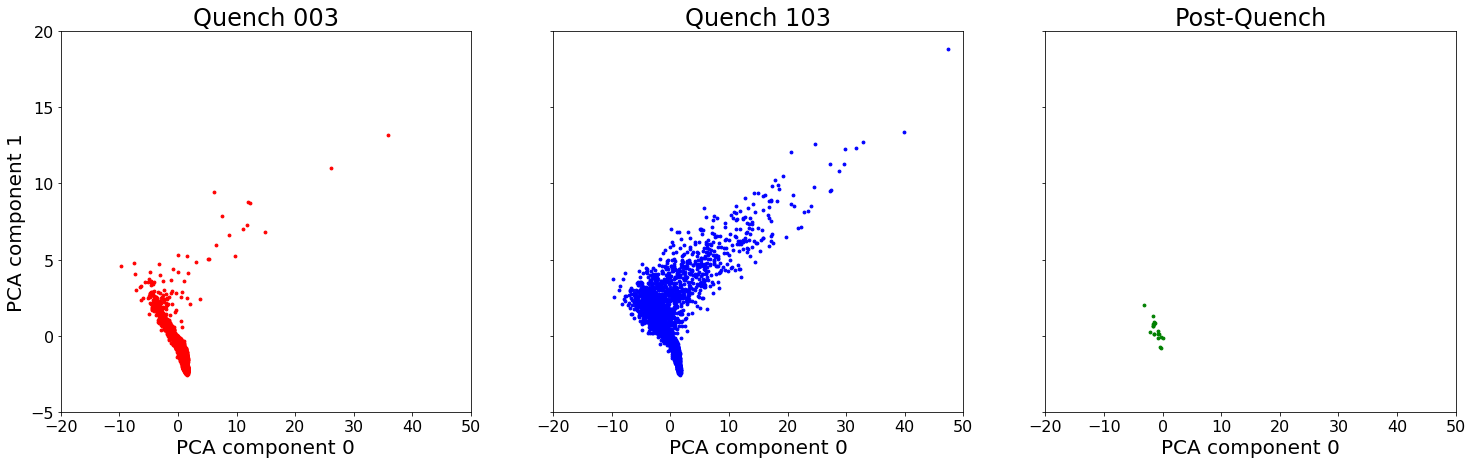

In [8]:
#plot separately

msize = 8
xlimits = (-20,50)
ylimits = (-5,20)

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25,7)
for i in range(qall_data.shape[0]):
    if i <= boundary1:
        axs[0].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[0].set_title('Quench 003')
        axs[0].set_xlim(xlimits)
        axs[0].set_ylim(ylimits)  
    elif boundary1 < i <= boundary2:
        axs[1].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[1].set_title('Quench 103')
        axs[1].set_xlim(xlimits)
        axs[1].set_ylim(ylimits)  
    else:
        axs[2].scatter(img_pca[i,0],img_pca[i,1], color=color_label[i], s=msize)
        axs[2].set_title('Post-Quench')
        axs[2].set_xlim(xlimits)
        axs[2].set_ylim(ylimits)  
        
        

for ax in axs.flat:
    ax.set(xlabel='PCA component 0', ylabel='PCA component 1')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [9]:
#use pandas data to make rainbow plots
import pandas as pd

df003 = pd.read_csv("/global/cscratch1/sd/stephey/march2020_data/summary_q003.csv",
                    names=["Num Zero Crossings", "Duration (pts)", "Umax^2",
                           "Urms^2", "Mean Freq (Hz)", "Mag Current (A)", "Abs Start Point"])

df103 = pd.read_csv("/global/cscratch1/sd/stephey/march2020_data/summary_q103.csv",
                    names=["Num Zero Crossings", "Duration (pts)", "Umax^2",
                           "Urms^2", "Mean Freq (Hz)", "Mag Current (A)", "Abs Start Point"])



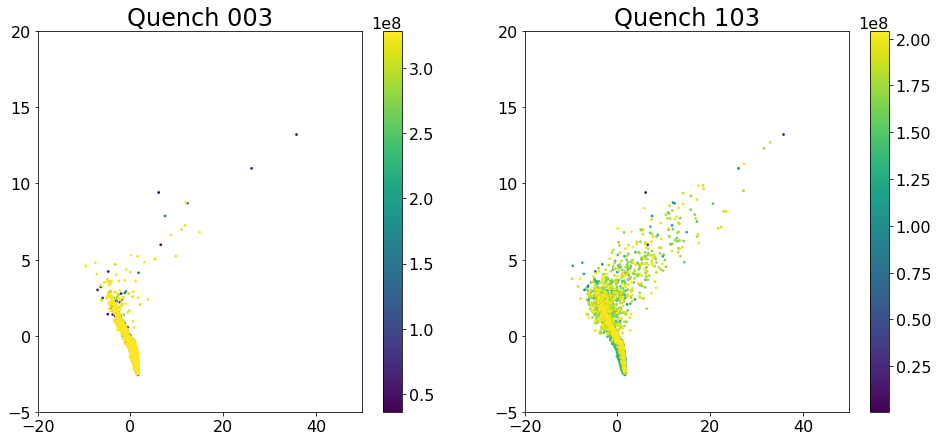

In [80]:
#rainbow plot as a function of abs starting point
#note that this doesn't include postquench data  (no summary files)

msize = 3
xlimits = (-20,50)
ylimits = (-5,20)

q003_pca_0 = list()
q003_pca_1 = list()
#do this part in advance
for i in range(q003_data.shape[0]):
    q003_pca_0.append(img_pca[i,0])
    q003_pca_1.append(img_pca[i,1])  
    
q103_pca_0 = list()
q103_pca_1 = list()
#do this part in advance
for i in range(q103_data.shape[0]):
    q103_pca_0.append(img_pca[i,0])
    q103_pca_1.append(img_pca[i,1])  
     

np003 = df003['Abs Start Point'].to_numpy()
np103 = df103['Abs Start Point'].to_numpy()    

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(16,7)
im0 = axs[0].scatter(q003_pca_0, q003_pca_1, c=np003, s=msize)
axs[0].set_title('Quench 003')
axs[0].set_xlim(xlimits)
axs[0].set_ylim(ylimits)
plt.colorbar(im0,ax=axs[0])

im1 = axs[1].scatter(q103_pca_0,q103_pca_1, c=np103, s=msize)
axs[1].set_title('Quench 103')
axs[1].set_xlim(xlimits)
axs[1].set_ylim(ylimits) 
plt.colorbar(im1,ax=axs[1])



In [ ]:
#rainblow plot as a function of time
#note that this doesn't include postquench data (no summary files)


In [ ]:
#rainbow plot as a function of zero crossings
#note that this doesn't include postquench data (no summary files)


In [ ]:
#rainbow plot as a function of duration
#note that this doesn't include postquench data (no summary files)


6636
6636


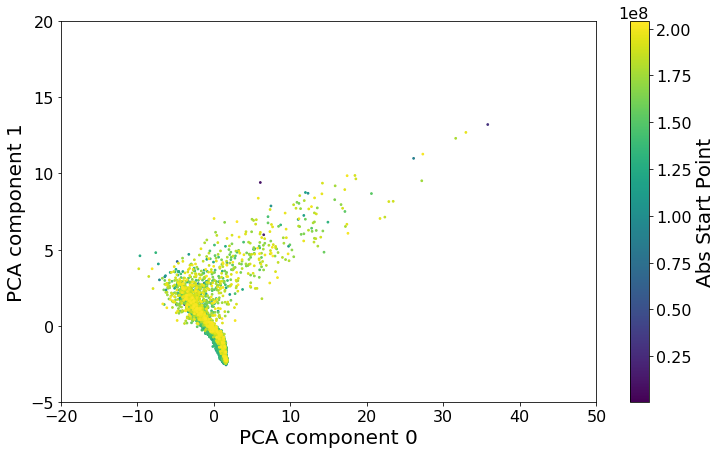

In [60]:
q103_pca_0 = list()
q103_pca_1 = list()
#do this part in advance
for i in range(q103_data.shape[0]):
    q103_pca_0.append(img_pca[i,0])
    q103_pca_1.append(img_pca[i,1])  
    
print(len(q103_pca_0))    

np103 = df103['Abs Start Point'].to_numpy()

print(len(np103))

plt.figure(figsize=(12, 7))
plt.scatter(q103_pca_0, q103_pca_1, c=np103, s=msize)
plt.xlim(xlimits)
plt.ylim(ylimits) 
plt.xlabel('PCA component 0')
plt.ylabel('PCA component 1')
cbar = plt.colorbar()
cbar.set_label('Abs Start Point', rotation=90, horizontalalignment='center')
plt.show()
